In [1]:
import sys
import os

# Assuming the notebook directory is the parent directory of 'load_intan_rhs_format' module
notebook_dir = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis'

# Define the path to the directory containing 'load_intan_rhs_format.py'
module_dir = os.path.join(notebook_dir, 'load_intan_rhs_format')

# Add the module directory to sys.path if it's not already there
if module_dir not in sys.path:
    sys.path.append(module_dir)

# Now you can import the read_data function directly from the file
from load_intan_rhs_format import read_data
import numpy as np
import os
import glob

def downsample_data(data, factor):
    """
    Downsample data by a given factor. Handles both 1D and 2D data arrays.
    
    Parameters:
    data (np.ndarray): Input data to downsample. Can be 1D or 2D.
    factor (int): Downsampling factor.
    
    Returns:
    np.ndarray: Downsampled data.
    """
    if data.ndim == 1:  # For 1D array
        return data[::factor]
    elif data.ndim == 2:  # For 2D array
        return data[:, ::factor]
    else:
        raise ValueError("Data must be either 1D or 2D.")


def extract_and_downsample_data(filename: str, downsample_factor=60):
    # Downsample from 30000Hz to 500Hz
    rawdata = read_data(filename)
    
    # Print the headers dynamically
    print("Headers in the RHS file:")
    for key, value in rawdata.items():
        print(key)
    
    # Print the keys
    print("\nKeys in the RHS file:", rawdata.keys())
    
    # Print the contents of all the keys
    for key, value in rawdata.items():
        print(f"\nContents of '{key}':")
        print(value)
        print()  # Add a newline for clarity
    
    # Extract amplifier (electrode) data
    amplifier_data = rawdata['amplifier_data']
    num_channels = amplifier_data.shape[0]
    
    # Extract stimulation data, ensuring it only reflects the expected 8 channels
    stim_data = rawdata.get('stim_data', np.zeros((8, amplifier_data.shape[1])))
    
    # Check if stim_data accidentally got more channels and correct it
    if stim_data.shape[0] != 8:
        stim_data = stim_data[:8, :]
        
    # Extract time points
    time_points = rawdata.get('t', np.array([]))
    
    # Downsample amplifier data
    amp_downsampled = downsample_data(amplifier_data, downsample_factor)
    
    # Downsample stimulation data
    stim_downsampled = downsample_data(stim_data, downsample_factor)
    
    # Downsample time points
    time_downsampled = downsample_data(time_points, downsample_factor)
    
    return amp_downsampled, stim_downsampled, time_downsampled, num_channels

# Example usage
filename = 'experiment_data/exp_240402_144316.rhs'
amplifier_data, stim_data, time_points, num_channels = extract_and_downsample_data(filename)

# Extract the file name without extension
base_filename = os.path.splitext(os.path.basename(filename))[0]

# Save the extracted data
savename = os.path.join(notebook_dir, 'experiment_data', f'{base_filename}_all_data.npz')
np.savez_compressed(savename, raw_amp=amplifier_data, raw_stim=stim_data, timestamps=time_points, num_channels=num_channels)


Reading Intan Technologies RHS Data File, Version 1.0

Found 32 amplifier channels.
Found 0 board ADC channels.
Found 8 board DAC channels.
Found 16 board digital input channels.
Found 0 board digital output channels.

File contains 1.911 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 0.1 seconds
Headers in the RHS file:
stim_parameters
notes
spike_triggers
amplifier_channels
frequency_parameters
reference_channel
board_dac_channels
board_dig_in_channels
t
stim_data
compliance_limit_data
charge_recovery_data
amp_settle_data
amplifier_data
board_dac_data
board_dig_in_data

Keys in the RHS file: dict_keys(['stim_parameters', 'notes', 'spike_triggers', 'amplifier_channels', 'frequency_parameters', 'reference_channel', 'board_dac_chan

In [2]:
import numpy as np

# File paths
file_paths = [
    '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments/experiment_data/exp_240402_144316_all_data.npz'
]

# Load and print contents of each file
for file_path in file_paths:
    print("Contents of file:", file_path)
    try:
        data = np.load(file_path)
        print("Keys in the file:", list(data.keys()))
        
        # Iterate through each key to print details about the data
        for key in data.keys():
            # Assuming that the data might be large, only show the shape and dtype of each array
            print(f"\nKey: '{key}'")
            print(f"Shape: {data[key].shape}, Dtype: {data[key].dtype}")
            # If you want to print a small part of the data for a preview (e.g., first 10 elements of each channel)
            if data[key].ndim > 1:  # Check if the data is multi-dimensional
                for i in range(data[key].shape[0]):  # Iterate over the first dimension (channels)
                    print(f"Channel {i+1} sample data: {data[key][i, :10]}...")  # Print first 10 samples
            else:
                print(f"Data sample: {data[key][:10]}...")  # Print first 10 samples for 1D arrays
    except Exception as e:
        print(f"Error loading file: {e}")
    print("\n")

Contents of file: /home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments/experiment_data/exp_240402_144316_all_data.npz
Keys in the file: ['raw_amp', 'raw_stim', 'timestamps', 'num_channels']

Key: 'raw_amp'
Shape: (32, 956), Dtype: float64
Channel 1 sample data: [-1.755  1.755 -4.485 -0.975  0.195  3.315 -0.585 -0.585  4.68   0.585]...
Channel 2 sample data: [-12.285   1.17    1.365   1.95   -3.315   0.39   -4.875   2.73    0.78
  -1.755]...
Channel 3 sample data: [-13.065   6.24   -4.095  -4.875   9.945  -6.63    4.485   1.17   -6.825
  -0.39 ]...
Channel 4 sample data: [-8.97   3.12  -0.975  0.78  -3.51  -6.63  -4.485  3.315 -4.875  3.705]...
Channel 5 sample data: [-10.92    2.145  -2.145   6.24   -0.78   -1.365  -2.535  -0.585  -3.9
   1.56 ]...
Channel 6 sample data: [-8.58   6.825 -3.705 -1.365  1.365  2.925 -1.17  -1.755 -3.9    6.045]...
Channel 7 sample data: [-14.2

In [3]:
import numpy as np

# Assuming 'savename' is the path to your npz file
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments/experiment_data/exp_240402_144316_all_data.npz'

# Load the data
data = np.load(savename)

# Assuming the stimulation data is under the key 'stim_data'
stim_data = data['raw_stim']

# Print unique values and counts for each of the 8 channels of stim_data
for i in range(stim_data.shape[0]):
    unique_values, counts = np.unique(stim_data[i], return_counts=True)
    print(f"Channel {i+1}:")
    for value, count in zip(unique_values, counts):
        print(f"  Value: {value}, Count: {count}")
    print()


Channel 1:
  Value: 0.0, Count: 956

Channel 2:
  Value: 0.0, Count: 956

Channel 3:
  Value: 0.0, Count: 956

Channel 4:
  Value: 0.0, Count: 956

Channel 5:
  Value: -1.0000000116860974, Count: 1
  Value: 0.0, Count: 955

Channel 6:
  Value: 0.0, Count: 956

Channel 7:
  Value: 0.0, Count: 956

Channel 8:
  Value: 0.0, Count: 956



In [4]:
import numpy as np

# Assuming 'savename' is the path to your npz file
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments/experiment_data/exp_240402_144316_all_data.npz'

# Load the data
data = np.load(savename)

# Assuming the stimulation data is under the key 'stim_data'
raw_amp = data['raw_amp']

# Print unique values and counts for each of the 8 channels of stim_data
for i in range(raw_amp.shape[0]):
    unique_values, counts = np.unique(raw_amp[i], return_counts=True)
    print(f"Channel {i+1}:")
    for value, count in zip(unique_values, counts):
        print(f"  Value: {value}, Count: {count}")
    print()


Channel 1:
  Value: -36.660000000000004, Count: 1
  Value: -19.11, Count: 1
  Value: -17.55, Count: 1
  Value: -15.21, Count: 1
  Value: -14.625, Count: 1
  Value: -13.455, Count: 1
  Value: -12.870000000000001, Count: 1
  Value: -12.675, Count: 1
  Value: -12.48, Count: 1
  Value: -11.895, Count: 1
  Value: -11.700000000000001, Count: 1
  Value: -11.31, Count: 1
  Value: -10.92, Count: 4
  Value: -10.725, Count: 4
  Value: -10.335, Count: 1
  Value: -9.945, Count: 1
  Value: -9.75, Count: 3
  Value: -9.555, Count: 2
  Value: -9.36, Count: 1
  Value: -9.165000000000001, Count: 4
  Value: -8.97, Count: 3
  Value: -8.775, Count: 1
  Value: -8.58, Count: 2
  Value: -8.385, Count: 6
  Value: -8.19, Count: 7
  Value: -7.995, Count: 4
  Value: -7.800000000000001, Count: 1
  Value: -7.605, Count: 7
  Value: -7.41, Count: 4
  Value: -7.215, Count: 3
  Value: -7.0200000000000005, Count: 3
  Value: -6.825, Count: 5
  Value: -6.63, Count: 7
  Value: -6.4350000000000005, Count: 2
  Value: -6.24, C

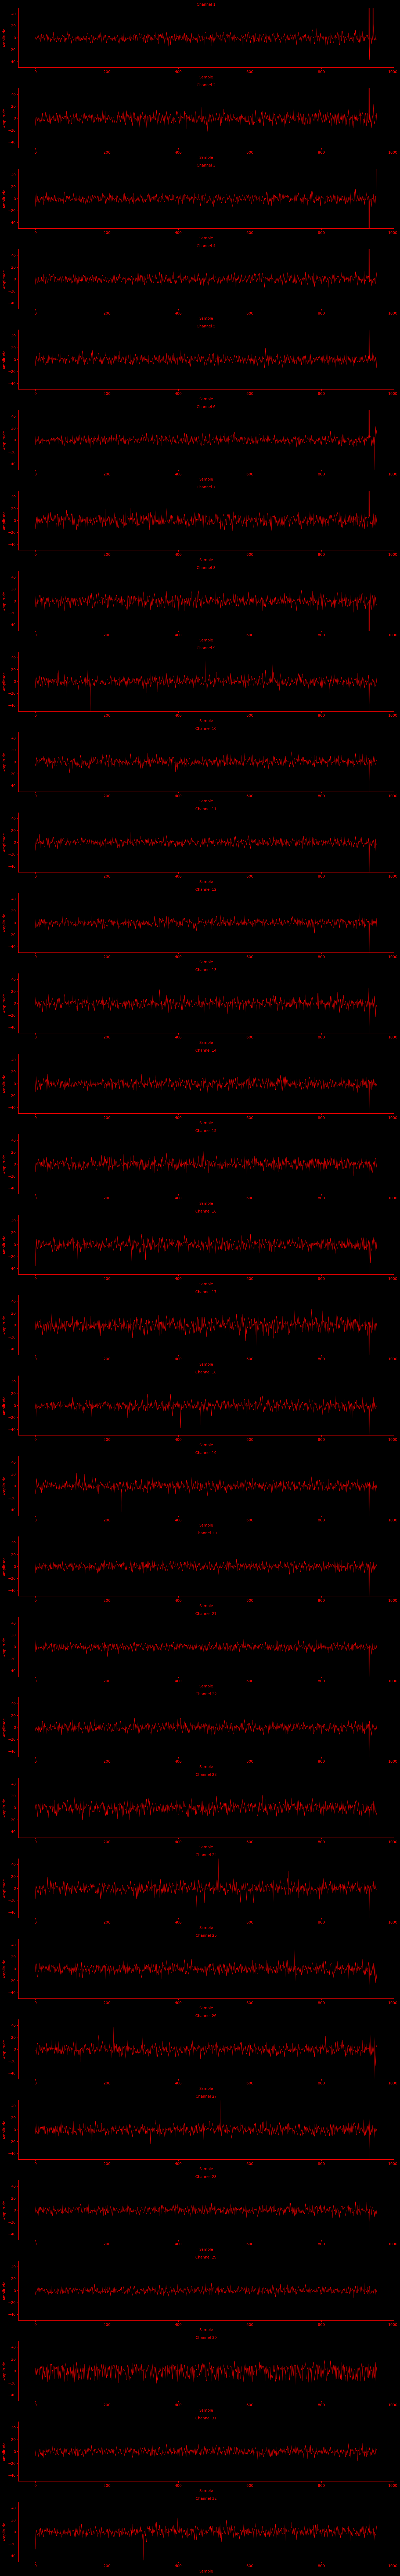

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
savename = '/home/vincent/MySSD/JupyterProjects/AAA_projects/UnlimitedResearchCooperative/Synthetic_Intelligence_Labs/human-cortical-organoid-signal-analysis/analysis_experiments/experiment_data/exp_240402_144316_all_data.npz'
data = np.load(savename)

# Access the amplifier data stored under the key 'raw_amp'
raw_amp = data['raw_amp']

# Define the number of plots based on the number of channels in the amplifier data
n_plots = raw_amp.shape[0]

# Create a figure to hold the subplots
plt.figure(figsize=(15, 3 * n_plots), facecolor='black')  # Adjust subplot size as needed

# Loop through each channel and create a subplot
for i in range(n_plots):
    plt.subplot(n_plots, 1, i+1)
    plt.plot(raw_amp[i], color='red', linewidth=0.5)  # Using a bright color for visibility
    plt.title(f'Channel {i+1}', color='red', fontsize=10)  # Set title with channel number
    plt.xlabel('Sample', color='red')  # Set x-label color
    plt.ylabel('Amplitude', color='red')  # Set y-label color
    plt.xticks(color='red')  # Set x-ticks color
    plt.yticks(color='red')  # Set y-ticks color
    plt.gca().spines['top'].set_visible(False)  # Hide the top spine
    plt.gca().spines['right'].set_visible(False)  # Hide the right spine
    plt.gca().spines['bottom'].set_color('red')  # Set x-axis color
    plt.gca().spines['left'].set_color('red')  # Set y-axis color
    plt.gca().tick_params(axis='x', colors='red')  # Set x-ticks color
    plt.gca().tick_params(axis='y', colors='red')  # Set y-ticks color
    plt.gca().set_facecolor('black')  # Set plot background to black
    plt.ylim(-50, 50)  # Set y-axis limits
    
plt.tight_layout()
plt.show()